In [39]:
%pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


Note: you may need to restart the kernel to use updated packages.


In [40]:
# Importing Data
data=pd.read_csv("../assets/Student_Performance.csv").head(150)
x1=data.iloc[:,2]
x2=data.iloc[:,4]
y=data.iloc[:,-2]
print(x1)
print(x2)
print(y)

0      85.93
1      83.58
2      81.84
3      72.28
4      97.48
       ...  
145    78.20
146    96.04
147    90.67
148    78.71
149    80.23
Name: Atten_Percent, Length: 150, dtype: float64
0       70.91
1       75.81
2       38.96
3       83.56
4       84.47
        ...  
145     84.35
146     51.16
147    100.00
148     89.02
149     65.44
Name: Mid_Sc, Length: 150, dtype: float64
0      68.86
1      69.29
2      50.39
3      78.81
4      72.09
       ...  
145    90.74
146    60.17
147    75.51
148    76.46
149    64.63
Name: Overall_Sc, Length: 150, dtype: float64


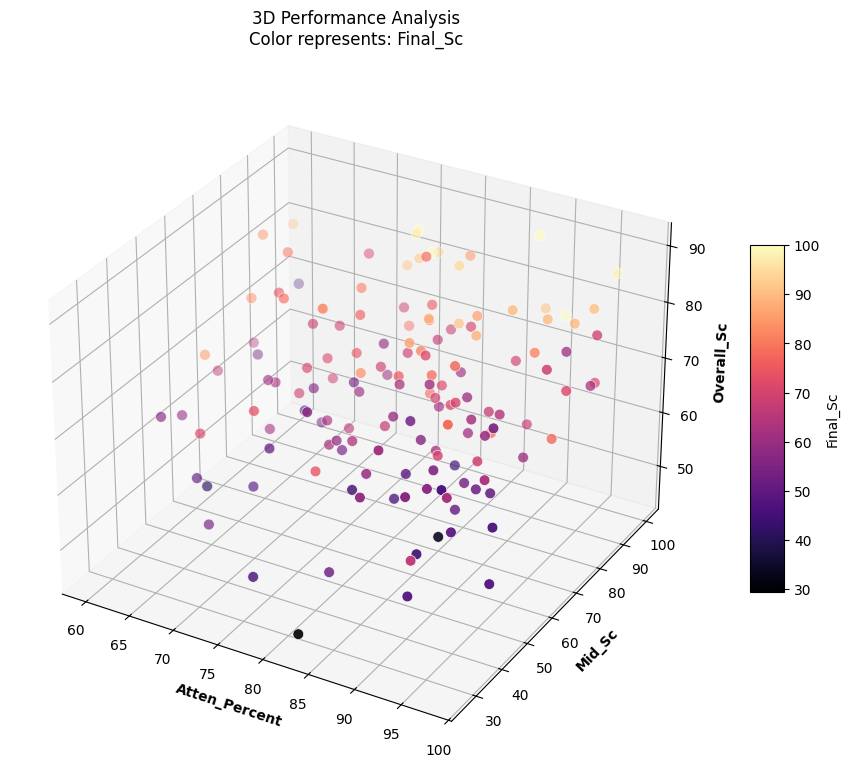

In [41]:
# 2. Setup the figure
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 3. Create the scatter plot
# Using 'magma' or 'viridis' helps the 4th dimension (color) pop
plot = ax.scatter(x1, x2, y, c=x3, cmap='magma', s=60, edgecolors='white', linewidth=0.5)

# 4. Labeling
ax.set_xlabel(x1.name, fontweight='bold')
ax.set_ylabel(x2.name, fontweight='bold')
ax.set_zlabel(y.name, fontweight='bold')
plt.title(f"3D Performance Analysis\nColor represents: {x3.name}", pad=20)

# 5. Add colorbar
fig.colorbar(plot, ax=ax, shrink=0.5, aspect=10, label=x3.name)

# 6. SAVE THE FILE
# dpi=300 ensures the image is high resolution for reports/presentations
plt.savefig("../assets/student_multi_feature_dataset_plot.png", dpi=300, bbox_inches='tight')


# 7. Show the plot (optional)
plt.show()

In [ ]:
# Training la Moodeeel

# Feature Scaling (Crucial for Gradient Descent convergence)
x1_scaled = (x1 - np.mean(x1)) / np.std(x1)
x2_scaled = (x2 - np.mean(x2)) / np.std(x2)

# 2. Build the Design Matrix X (Adding a column of 1s for the Intercept)
# This allows us to do a single dot product for: theta0 + theta1*x1 + theta2*x2
m = len(y)
X = np.c_[np.ones(m), x1_scaled, x2_scaled]  # Shape (150, 3)

# 3. Model Parameters
theta_vector = np.array([0.0, 0.0, 0.0]) # Initial weights [theta0, theta1, theta2]
theta_history = []
epochs = 1000
alpha = 0.01 # Learning rate

# 4. Training Loop (Gradient Descent)
for epoch in range(epochs):
    # Calculate Predictions: h(x) = X . theta
    # This is a batch dot product for all 150 rows
    predictions = np.dot(X, theta_vector)
    
    # Calculate Error
    error = predictions - y
    
    # Calculate Gradient (The derivative of the Cost Function)
    # gradient = (1/m) * X_transpose * error
    gradient = (1/m) * np.dot(X.T, error)
    
    # Update Coefficients (The "Learning" step)
    theta_vector = theta_vector - (alpha * gradient)
    
    # Save the history of the vector
    theta_history.append(theta_vector.copy())

# Output results
print(f"Final Coefficients (theta0, theta1, theta2): {theta_vector}")
print(f"First 5 history entries:\n{theta_history[:5]}")



Final Coefficients (theta0, theta1, theta2): [69.61632778  0.98711917  6.53035149]
First 5 history entries:
[array([0.69619333, 0.00404622, 0.06442672]), array([1.38542473, 0.00810947, 0.12821278]), array([2.06776382, 0.01218901, 0.19136461]), array([2.74327951, 0.01628413, 0.25388856]), array([3.41204005, 0.02039409, 0.31579092]), array([4.07411299, 0.02451819, 0.37707793]), array([4.72956519, 0.02865575, 0.43775575]), array([5.37846287, 0.03280609, 0.49783048]), array([6.02087158, 0.03696854, 0.55730817]), array([6.65685619, 0.04114245, 0.6161948 ]), array([7.28648096, 0.04532717, 0.67449629]), array([7.90980949, 0.04952208, 0.7322185 ]), array([8.52690473, 0.05372655, 0.78936723]), array([9.13782901, 0.05793998, 0.84594822]), array([9.74264406, 0.06216177, 0.90196716]), array([10.34141095,  0.06639134,  0.95742969]), array([10.93419017,  0.07062811,  1.01234136]), array([11.5210416 ,  0.07487152,  1.0667077 ]), array([12.10202452,  0.07912102,  1.12053416]), array([12.67719761,  0.0

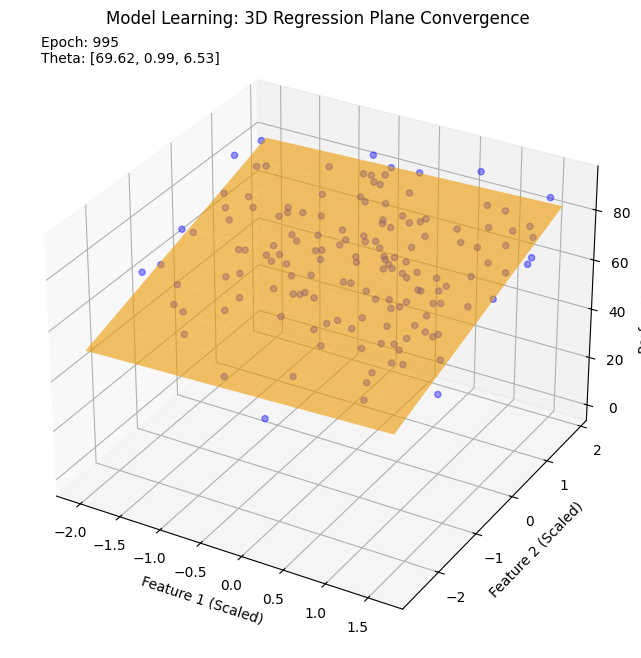

In [44]:
# --- 1. Animation Setup ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the static actual data points
ax.scatter(x1_scaled, x2_scaled, y, color='blue', alpha=0.4, label='Actual Data')

# Create a meshgrid for the plane
x1_range = np.linspace(x1_scaled.min(), x1_scaled.max(), 10)
x2_range = np.linspace(x2_scaled.min(), x2_scaled.max(), 10)
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)

# Initialize the surface plot (the learning plane) with zeros
# We store it in a list to modify it inside the animate function
plane = [ax.plot_surface(X1_mesh, X2_mesh, np.zeros_like(X1_mesh), alpha=0.5, color='orange')]

# Text overlay for tracking progress
text_eps = ax.text2D(0.05, 0.95, "", transform=ax.transAxes)

ax.set_xlabel('Feature 1 (Scaled)')
ax.set_ylabel('Feature 2 (Scaled)')
ax.set_zlabel('Performance Index')
ax.set_title("Model Learning: 3D Regression Plane Convergence")

# --- 2. Animation Logic ---

def update_plane(i):
    # Remove the old surface to draw the new one
    plane[0].remove()
    
    # Get current theta vector from your saved history
    # theta_history[i] = [theta0, theta1, theta2]
    t0, t1, t2 = theta_history[i]
    
    # Calculate new Z values based on current thetas
    Z_new = t0 + (t1 * X1_mesh) + (t2 * X2_mesh)
    
    # Plot new surface
    plane[0] = ax.plot_surface(X1_mesh, X2_mesh, Z_new, alpha=0.6, color='orange')
    
    # Update text
    text_eps.set_text(f'Epoch: {i}\nTheta: [{t0:.2f}, {t1:.2f}, {t2:.2f}]')
    
    return plane[0], text_eps

# --- 3. Run and Save ---
# To keep the GIF size reasonable, we can skip frames (step=5)
frames_to_show = range(0, len(theta_history), 5)

anim = FuncAnimation(fig, update_plane, frames=frames_to_show, 
                     interval=50, blit=False)

# Save the animation
# Note: 'pillow' writer is best for .gif files
anim.save('../assets/student_multi_feature_training.gif', writer='pillow', fps=10)

plt.show()